#**Importing Tools**

In [46]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data**

In [8]:
data = pd.read_csv("/content/drive/MyDrive/kaggle/train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_train = data[8400:m, :]
Y_train = data_train[:,0]
X_train = data_train[:,1:n]
X_train = X_train / 255

data_test = data[0:8400, :]
Y_test = data_test[:,0]
X_test = data_test[:,1:n]
X_test = X_test / 255

#**Building the Model**

In [9]:
model = Sequential()
model.add(Dense(units = 128, activation = "relu", input_dim = len(X_train[0,:])))  #128 Neurons in the first hidden layer
model.add(Dense(units = 128, activation = "relu"))                                 #128 Neurons in the second hidden layer
model.add(Dense(units = 10, activation = "softmax"))                               #Output layer

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

#**Fit, Predict and Testing**

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 8/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 9/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 10/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.006

In [14]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

263/263 [==============================] - 1s 2ms/step


In [15]:
accuracy_score(Y_test, Y_pred)

0.9770238095238095

In [59]:
def make_predictions(X, NN):
  A = NN.predict(X)
  predictions = np.argmax(A[0])
  return predictions

def test_prediction(index, NN):
  current_image = X_test[index, :]
  prediction = make_predictions(X_test[index, :][np.newaxis,:], NN)
  label = Y_test[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.imshow(current_image, interpolation='nearest')
  plt.rcParams["figure.figsize"] = (1,1)
  plt.show()
  plt.rcParams["figure.figsize"] = (1,1)

1/1 [==============================] - 0s 29ms/step
Prediction:  8
Label:  8


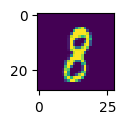

1/1 [==============================] - 0s 35ms/step
Prediction:  6
Label:  6


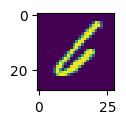

1/1 [==============================] - 0s 37ms/step
Prediction:  3
Label:  3


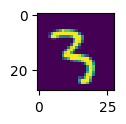

1/1 [==============================] - 0s 35ms/step
Prediction:  9
Label:  9


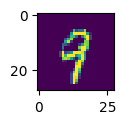

1/1 [==============================] - 0s 36ms/step
Prediction:  4
Label:  4


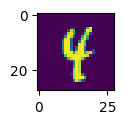

1/1 [==============================] - 0s 19ms/step
Prediction:  1
Label:  1


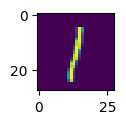

1/1 [==============================] - 0s 20ms/step
Prediction:  5
Label:  5


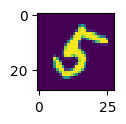

1/1 [==============================] - 0s 21ms/step
Prediction:  2
Label:  2


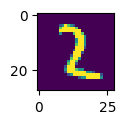

1/1 [==============================] - 0s 20ms/step
Prediction:  0
Label:  0


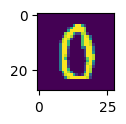

In [61]:
test_prediction(12, model)
test_prediction(11, model)
test_prediction(19, model)
test_prediction(13, model)
test_prediction(68, model)
test_prediction(128, model)
test_prediction(23, model)
test_prediction(105, model)
test_prediction(4, model)

#**Saving the model**

In [64]:
model.save("drive/MyDrive/Models/Digit_Recog_model")

In [65]:
del model

In [66]:
model = load_model("drive/MyDrive/Models/Digit_Recog_model")